# IMPORTING LIBRARIES

In [1]:
import tensorflow as tf

In [20]:
import numpy as np

In [36]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
from tensorflow.keras.optimizers import Adam

In [6]:
from tensorflow.keras.applications import VGG16

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# LOADING AND PREPROCESSING THE CIFAR-10 DATASET

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# VERIFYING THE DATA

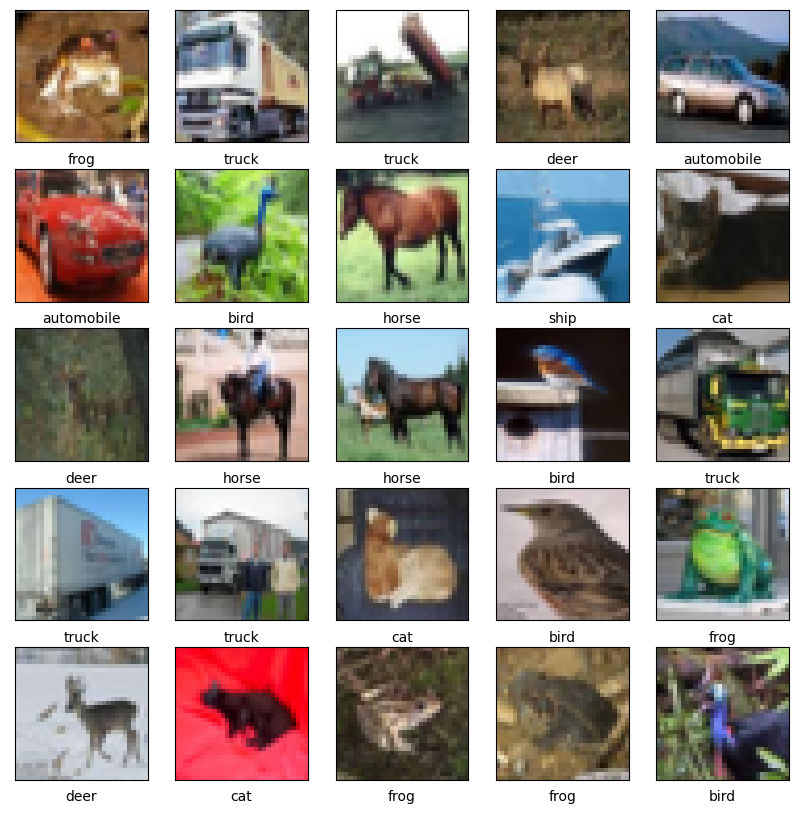

In [65]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# BUILDING THE CNN MODEL

In [9]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# COMPILING THE CNN MODEL

In [67]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# TRAINING THE CNN MODEL

In [54]:
cnn_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 50s 60ms/step - loss: 1.6410 - accuracy: 0.4011 - val_loss: 1.2910 - val_accuracy: 0.5313
Epoch 2/10
782/782 [==============================] - 47s 61ms/step - loss: 1.3388 - accuracy: 0.5201 - val_loss: 1.1952 - val_accuracy: 0.5849
Epoch 3/10
782/782 [==============================] - 47s 61ms/step - loss: 1.2099 - accuracy: 0.5722 - val_loss: 1.0762 - val_accuracy: 0.6264
Epoch 4/10
782/782 [==============================] - 47s 61ms/step - loss: 1.1256 - accuracy: 0.6018 - val_loss: 0.9953 - val_accuracy: 0.6550
Epoch 5/10
782/782 [==============================] - 47s 60ms/step - loss: 1.0587 - accuracy: 0.6292 - val_loss: 0.9662 - val_accuracy: 0.6603
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 1.0083 - accuracy: 0.6475 - val_loss: 0.9603 - val_accuracy: 0.6663
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.9650 - accuracy: 0.6607 - val_loss: 0.9257 - val_accuracy:

# EVALUATING THE CNN MODEL

In [22]:
cnn_scores = cnn_model.evaluate(x_test, y_test, verbose=0)
print("CNN Model - Test Accuracy:", cnn_scores[1])

CNN Model - Test Accuracy: 0.10580000281333923


# PREDICTING CNN THE MODEL

In [23]:
cnn_predictions = np.argmax(cnn_model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


# CONFUSION MATRIX FOR CNN MODEL

In [30]:
cnn_cm = confusion_matrix(y_test, cnn_predictions)

In [32]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

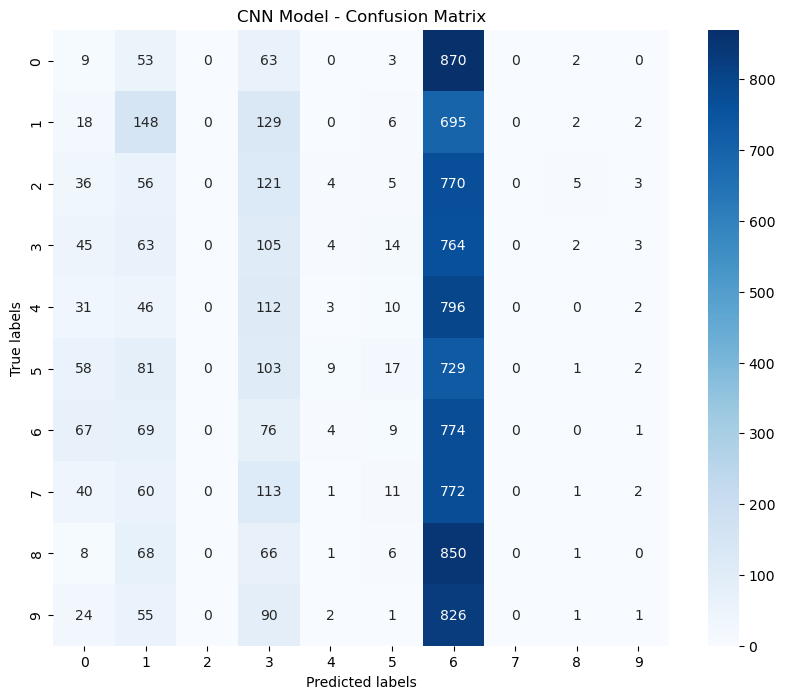

In [37]:
plot_confusion_matrix(cnn_cm, "CNN Model - Confusion Matrix")
plt.show()

# EVALUATION METRICS FOR CNN MODEL

In [44]:
print("CNN Model:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1-score:", cnn_f1)

CNN Model:
Accuracy: 0.1058
Precision: 0.0888154311922736
Recall: 0.1058
F1-score: 0.051005419078291474


# BUILDING THE TRANSFER LEARNING MODEL

In [43]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

transfer_learning_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# COMPILING THE TRANSFER LEARNING MODEL

In [14]:
transfer_learning_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EVALUATING THE TRANSFER LEARNING MODEL

In [16]:
transfer_learning_scores = transfer_learning_model.evaluate(x_test, y_test, verbose=0)
print("Transfer Learning Model - Test Accuracy:", transfer_learning_scores[1])

Transfer Learning Model - Test Accuracy: 0.09910000115633011


# PREDICTING THE TRANSFER LEARNING MODEL

In [24]:
transfer_learning_predictions = np.argmax(transfer_learning_model.predict(x_test), axis=-1)

313/313 [==============================] - 40s 128ms/step


# CONFUSION MATRIX FOR TRANSFER LEARNING MODEL

In [31]:
transfer_learning_cm = confusion_matrix(y_test, transfer_learning_predictions)

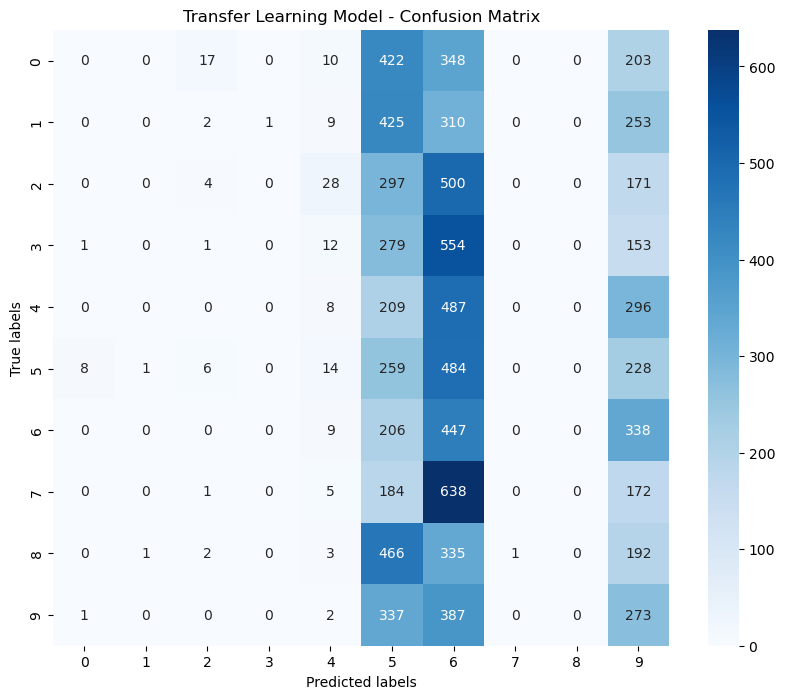

In [38]:
plot_confusion_matrix(transfer_learning_cm, "Transfer Learning Model - Confusion Matrix")
plt.show()

# EVALUATION METRICS FOR TRANSFER LEARNING MODEL

In [42]:
print("Transfer Learning Model:")
print("Accuracy:", transfer_learning_accuracy)
print("Precision:", transfer_learning_precision)
print("Recall:", transfer_learning_recall)
print("F1-score:", transfer_learning_f1)

Transfer Learning Model:
Accuracy: 0.0991
Precision: 0.050453790998521424
Recall: 0.0991
F1-score: 0.04784820343089531


# MONITORING AND REGULARIZATION

In [45]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_best_model.h5', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

In [47]:
history = cnn_model.fit(x_train, y_train, batch_size=64, epochs=20, 
                        validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/20
782/782 [==============================] - 37s 48ms/step - loss: 1.0379 - accuracy: 0.6371 - val_loss: 0.9417 - val_accuracy: 0.6727
Epoch 2/20
782/782 [==============================] - 38s 48ms/step - loss: 0.9752 - accuracy: 0.6588 - val_loss: 0.9153 - val_accuracy: 0.6804
Epoch 3/20
782/782 [==============================] - 39s 50ms/step - loss: 0.9274 - accuracy: 0.6750 - val_loss: 0.9093 - val_accuracy: 0.6889
Epoch 4/20
782/782 [==============================] - 40s 51ms/step - loss: 0.8906 - accuracy: 0.6870 - val_loss: 0.8602 - val_accuracy: 0.7018
Epoch 5/20
782/782 [==============================] - 42s 54ms/step - loss: 0.8567 - accuracy: 0.6985 - val_loss: 0.8685 - val_accuracy: 0.7029
Epoch 6/20
782/782 [==============================] - 42s 54ms/step - loss: 0.8233 - accuracy: 0.7110 - val_loss: 0.8590 - val_accuracy: 0.7069
Epoch 7/20
782/782 [==============================] - 43s 55ms/step - loss: 0.7852 - accuracy: 0.7220 - val_loss: 0.8566 - val_accuracy:

# ACCURACY CURVE

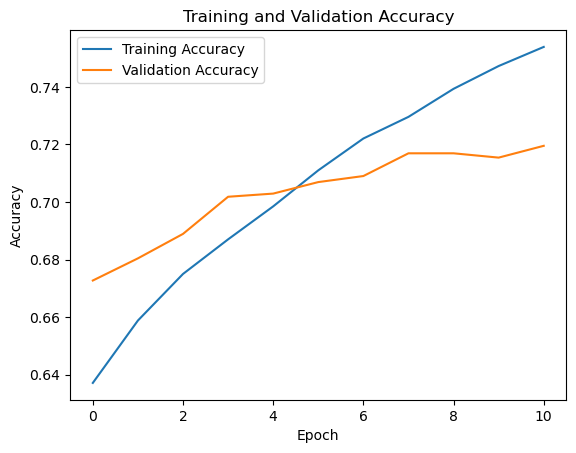

In [48]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# LOSS CURVE

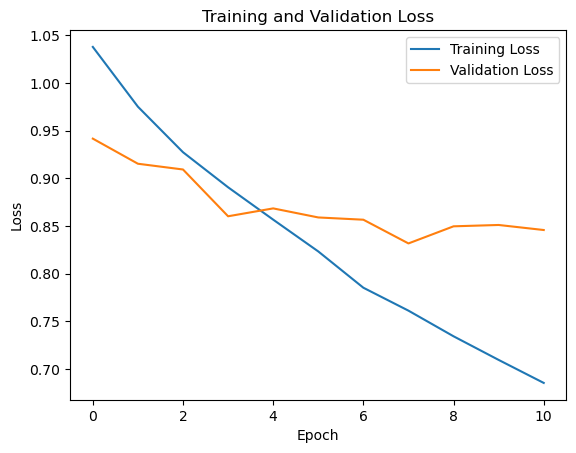

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# LOADING AND EVALUATING THE BEST MODEL CHECKPOINT

In [53]:
best_cnn_model = tf.keras.models.load_model('cnn_best_model.h5')

In [54]:
best_cnn_scores = best_cnn_model.evaluate(x_test, y_test, verbose=0)
print("Best CNN Model - Test Accuracy:", best_cnn_scores[1])

Best CNN Model - Test Accuracy: 0.7168999910354614
